# 총 정리

### 수정할 내용
★ 3번 수정 할 사항
- ~~공백 입력됨~~ → 수정함. my solution
- 특정 형식으로 입력하지 않아도 입력 됨

★ ~~11번 수정할 사항~~ → 수정함. my solution


- ~~이렇게하면 공백도 입력받음~~

### 새로 알게 된 내용
★ 4번
- max_list를 사용해서 조건식 여러개를 for문으로 걸었음

★ 5번
- format(금액, ',') : 천단위로 ,를 써줌
- 고정 자릿수 만들기
- 단위 테스트 프레임 워크

★ 6번
- abstractmethod를 가진 abstractclass를 이용해서 class의 전체 형태를 잡아줄 수 있다.

★ 7번
- SQL → group by를 id만 해도 name과 tot_cred는 해당 id마다 1개씩만 존재하므로 굳이 함께 group by를 쓰지 않아도 괜찮다.

--------

# 3. __파이썬 파일 입출력 && 파이썬 데이터 다루기__ [최주원]

백종원 씨는 너무 많은 프랜차이즈 정보를 확인하는 것에 지쳐서, 

csv 파일을 통해 원하는 데이터를 읽고, 추가할 수 있는 시스템을 맡기기로 결정하였다.

광주인공지능사관학교 학생들이 파이썬 실력이 훌륭하다는 말을 듣고, 찾아와 당신에게 의뢰하였다.

__주석에 지시에 따라 함수를 완성하고 실행하시오__

In [10]:
# 답안
# python csv 모듈 공식 문서 참고
# pandas 등 사용하지 않고 풀어주시기 바랍니다.
# 한글 데이터를 다룰 경우 인코딩 문제가 생길 수 있습니다 -> 구글링으로 해결해주세요 (ex) 검색 : python 한글 인코딩 문제)

# 상점 데이터를 추가하고 원하는 column을 선택하여 읽을 수 있는 프로그램을 만드시오.

# 상점의 데이터 -> (이름, 위치, 판매하는 상품, 전화번호)

import csv

stores_data_csv_path = "./stores_data.csv"

# 상점 데이터 예시
baeks_stores = [
    {
        "name": "빽다방 광주 상무역점",
        "location": "광주 서구 치평로 20",
        "goods": "커피",
        "num": "0507-1430-3335"
    },
    {
        "name": "새마을 식당 광주 금호점",
        "location": "광주 서구 운천로 17번길 4",
        "goods": "고기",
        "num": "062-381-7661"
    },
    {
        "name": "빽다방 종로관철점",
        "location": "서울 종로구 종로 10길 21",
        "goods": "커피",
        "num": "062-498-2348"
    }
]


with open(stores_data_csv_path, 'w', newline='') as f:
    writer = csv.writer(f)
    for branch in baeks_stores:
        writer.writerow(list(branch.values()))  



# 필요한 기능
# 1. 상점의 데이터를 csv 파일에 등록하는 기능(insert)
# 2. 상점들의 이름을 모두 출력하는 기능(read)
# 3. 상점의 이름을 입력 받으면, 해당 상점의 위치를 출력하는 기능(read)
# 4. 상점의 이름을 입력 받으면, 해당 상점의 판매하는 상품을 출력하는 기능(read)
# 5. 상점의 이름을 입력 받으면, 해당 상점의 전화번호를 출력하는 기능(read)

# 실행 예시
# 1. 출력 : “성공적으로 등록되었습니다 “ / 결과 : csv 파일에 등록한 이름 잘 들어갈것
# 2. 출력 : “빽다방 광주 상무역점, 새마을 식당 광주 금호점, 빽다방 종로관철점, 백인공지능 판매점”
# 3. 출력: “빽다방 광주 상무역점의 위치는 광주 서구 치평로 20 입니다. / 없을 경우 : "입력하신 이름의 상점이 없습니다."
# 4. 출력 : “빽다방 광주 상무역점은 커피를 판매합니다.” / 없을 경우 : "입력하신 이름의 상점이 없습니다."
# 5. 출력 : “빽다방 광주 상무역점의 전화번호는 0507-1430-3335 입니다.” / 없을 경우 : "입력하신 이름의 상점이 없습니다."


def get_csv_row_count(file_path):
    with open(file_path, 'r') as csvfile:
        row_count = sum(1 for row in csv.reader(csvfile))
        return row_count


def get_store_data(selected, target_name):
    row_count = get_csv_row_count(stores_data_csv_path)

    with open(stores_data_csv_path, 'r') as csvfile:
        csv_reader = csv.reader(csvfile)

        count = 0

        for row in csv_reader:
            count += 1

            if target_name == row[0]:
                return row[int(selected)-2]
            elif count == row_count: # "전부 다 봤다"
                return '존재하지 않는 상점 이름입니다.'


def add_stores_data():
    user_input = {
        "name": "",
        "location": "",
        "goods": "",
        "num": ""
    }

    user_input["name"] = input('등록하실 상점의 이름을 입력하세요 : \n')
    user_input["location"] = input('등록하실 상점의 위치를 입력하세요 : \n')
    user_input["goods"] = input('등록하실 상점의 상품 종류를 입력하세요 : \n')
    user_input["num"] = input('등록하실 상점의 전화번호를 입력하세요 : \n')

    with open(stores_data_csv_path, 'a', newline='') as csvfile:
        fieldnames = ["name", "location", "goods", "num"]
        csv_writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#         csv_writer.writeheader() # filednames로 칼럼명 생성
        csv_writer.writerow(user_input)

    return print('성공적으로 추가하였습니다!')


def get_stores_name(selected):
    stores_names = []

    with open(stores_data_csv_path, 'r') as csvfile:
        csv_reader = csv.reader(csvfile)

#         count = 0

        for row in csv_reader:
#             if count == 0: # header가 csv파일에 들어가있는 경우
#                 count += 1
#                 continue
#             else:
                stores_names.append(row[0])

    return stores_names


def main():
    selected = input(
        "1 - 상점추가, 2 - 상점 모두 보기, 3 - 상점 위치 찾기, 4 - 판매하는 상품 종류 보기, 5 - 상점 전화번호 찾기, 0 - 프로그램 종료 \n")
    # selected = "1"

    # TODO 0. csv 파일이 생성되지 않으면 읽을 수 없습니다.
    # TODO 1의 등록하는 기능을 구현하여, 예시 데이터를 Write 하는 과정을 먼저 수행해주세요.

    if selected == "1":
        # TODO 1. 상점의 데이터를 csv 파일에 등록하는 기능
        # - 상점의 이름, 위치, 상품종류, 전화번호를 예시 데이터에 맞게 입력을 받기
        # - 입력 받은 데이터를 csv 파일에 write
        add_stores_data()

    elif selected == "2":
        # TODO 2. 상점의 이름을 모두 출력하는 기능
        # - csv 에 등록되어 있는 모든 파일의 이름을 출력하기
        stores_name = get_stores_name(selected)

        print(stores_name)

    elif selected == "3" or selected == "4" or selected == "5":
        # TODO 3. 상점 위치 찾기 기능
        # - 상점 이름을 입력받고, 해당 상점의 위치를 출력 해주기
        target_name = input('찾으실 상점의 이름을 입력하세요 : \n')
        print(get_store_data(selected, target_name))

    elif selected == "0":
        exit()

    else:
        print('잘못된 입력입니다!')


# 메인 함수 실행
main()


1 - 상점추가, 2 - 상점 모두 보기, 3 - 상점 위치 찾기, 4 - 판매하는 상품 종류 보기, 5 - 상점 전화번호 찾기, 0 - 프로그램 종료 
1
등록하실 상점의 이름을 입력하세요 : 

등록하실 상점의 위치를 입력하세요 : 

등록하실 상점의 상품 종류를 입력하세요 : 

등록하실 상점의 전화번호를 입력하세요 : 

성공적으로 추가하였습니다!


★ 3번 수정 할 사항

- 공백 입력됨
- 특정 형식으로 입력하지 않아도 입력 됨

In [12]:
# 수정한 my solution

baeks_stores = [
    {
        "name" : "빽다방 광주 상무역점",
        "location" : "광주 서구 치평로 20",
        "goods" : "커피",
        "num" : "0507-1430-3335"
    },
    {
        "name" : "새마을 식당 광주 금호점" ,
        "location" : "광주 서구 운천로17번길 4",
        "goods" : "고기",
        "num" : "062-381-7661"
    },
    {
        "name" : "빽다방 종로관철점" ,
        "location" : "서울 종로구 종로10길 21",
        "goods" : "커피",
        "num" : "00-2445-5324"
    },
    {
        "name" : "백인공지능 판매점" ,
        "location" : "광주 북구 첨단과기로",
        "goods" : "인공지능",
        "num" : "1234-5678-9123"
    }
]

import csv


with open('baeks_stores.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    for branch in baeks_stores:
        writer.writerow(list(branch.values()))   
        
        
def main() :
    selected = input('1 - 상점추가, 2 - 상점 모두 보기, 3 - 상점 위치 찾기, 4 - 판매하는 상품 종류 보기, 5 - 상점 전화번호 찾기, 0 - 프로그램 종료')
      
        
    if selected == '1' :
    # TODO 1. 상점의 데이터를 csv 파일에 등록하는 기능
    # - 상점의 이름, 위치, 상품종류, 전화번호를 예시 데이터에 맞게 입력을 받기
        name = ''
        location = ''
        goods = ''
        num = ''
        
        check = 1
        while check:
            name = input('상점 이름을 입력하세요: ')
            location = input('상점 위치를 입력하세요: ')
            goods = input('판매하는 상품을 입력하세요: ')    
            num = input('전화번호를 입력하세요(예:02-123-1234): ')
            
            if name == '' or location == '' or goods == '' or num == '':
                print('입력되지 않은 항목이 있습니다. 다시 시도해주세요.')
                continue
                      
            with open('baeks_stores.csv', 'a') as f:
                writer = csv.writer(f)
                writer.writerow([name, location, goods, num])
                break

        
    elif selected == '2' :
    # TODO 2. 상점의 이름을 모두 출력하는 기능
        name = []
        with open('baeks_stores.csv', 'r') as f:
            for i in csv.reader(f):
                name.append(i[0])

        print(', '.join(name))
        
        
    elif selected == '3' :
    # TODO 3. 상점 위치 찾기 기능
        name = input('상점 이름을 입력해주세요: ')
        
        with open('baeks_stores.csv', 'r') as f:

            name_check = 1
            while name_check:
                for i in csv.reader(f):
                    if i[0] == name:
                        name_check = 0
                        print(f'{name}의 위치는 {i[1]} 입니다.')
                        break

                if name_check:
                    print("입력하신 이름의 상점이 없습니다.")
    
    
    elif selected == '4' :
    # TODO 4. 판매하는 물건 보기
        name = input('상점 이름을 입력해주세요: ')

        with open('baeks_stores.csv', 'r') as f:

            name_check = 1
            while name_check:
                for i in csv.reader(f):
                    if i[0] == name:
                        name_check = 0
                        print(f'{name}은 {i[2]}을(를) 판매합니다.')
                        break

                    if name_check:
                        print("입력하신 이름의 상점이 없습니다.")
    
    
    elif selected == '5' :
    # TODO 5. 상점 전화번호 찾기
        name = input('상점 이름을 입력해주세요: ')

        with open('baeks_stores.csv', 'r') as f:

            name_check = 1
            while name_check:
                for i in csv.reader(f):
                    if i[0] == name:
                        name_check = 0
                        print(f'{name}의 전화번호는 {i[3]} 입니다.')
                        break

                if name_check:
                    print("입력하신 이름의 상점이 없습니다.")

    
    elif selected == '0' :
        exit()
     
    else:
        print('잘못된 입력입니다!')
# 메인 함수 실행
main()

1 - 상점추가, 2 - 상점 모두 보기, 3 - 상점 위치 찾기, 4 - 판매하는 상품 종류 보기, 5 - 상점 전화번호 찾기, 0 - 프로그램 종료1
상점 이름을 입력하세요: 
상점 위치를 입력하세요: 
판매하는 상품을 입력하세요: 
전화번호를 입력하세요(예:02-123-1234): 
입력되지 않은 항목이 있습니다. 다시 시도해주세요.
상점 이름을 입력하세요: 빽다방 대학로점
상점 위치를 입력하세요: 서울시 종로구
판매하는 상품을 입력하세요: 커피
전화번호를 입력하세요(예:02-123-1234): 02-132-1234


# 4. __파이썬 알고리즘__ [양지웅]

#### 아래 코드는 입력받은 문자열 s가 올바른 시간 형식인지 (ex: "14:30:00") 검증하는 코드이다.<br>
(단, 표기 가능한 시간은 00:00:00부터 23:59:59까지로 간주한다.<br> 입력되는 문자열은 기본적으로 00~99에 해당하는 2자리 숫자와 ":" 문자의 결합으로 이루어진다.<br> 비정상적인 형태의 문자열은 입력되지 않으며 올바른 시간 값에 해당하는 수치 검증만 행해도 무방하다.)<br>

__다음 코드의 is_valid_time 함수를 구현하시오__

In [ ]:
# 답안
test_times = [
    "14:30:00",
    "12:70:00",
    "24:00:00"
]

def is_valid_time(time_str):
    max_list = [24, 60, 60] 
    time_list = time_str.split(':') # ['14', '30', '00']
#     print('time_list')
    

# 방법1)
    idx = 0
    for time in time_list:
        if int(time) >= max_list[idx]:
            return False

        idx += 1
    return True

# 방법2)
    for idx in range(len(time_list)):
        time = time_list[idx]
        if int(time) >= max_list[idx]:
            return False

    return True

# 방법3)
    for idx, time in enumerate(time_list):
        if int(time) >= max_list[idx]:
            return False
    
    return True


for time in test_times:
    print(is_valid_time(time))

★ 4번

- max_list를 사용해서 조건식 여러개를 for문으로 걸었음

# 5. __파이썬 클래스__ [박준영]

__다음 출력결과가 되도록 Account 클래스를 완성하시오.__

출력
```
은행이름: SC은행
계좌번호: 670-14-689475
--------------------
총 계좌수: 2
총 계좌수: 3
--------------------
5
--------------------
100
200
--------------------
은행이름: SC은행
예금주: 파이썬
계좌번호: 973-96-615694
잔고: 10,000
--------------------
110
--------------------
100
200
300
--------------------
100
200
--------------------
```

In [13]:
import random

class Account:
  # 클래스 변수
    account_count = 0

    def __init__(self, name, balance):
        self.deposit_count = 0  # 입금횟수 초기화
        self.deposit_log = []   # 입금내역
        self.withdraw_log = []  # 출금내역

        # 빠뜨린 속성 추가 구현
        self.name = name
        self.balance = balance
        self.bank = "SC은행"

        # 랜덤하게 개좌번호 생성을 구현
        num1 = str(random.randint(0, 999)).zfill(3)
        num2 = str(random.randint(0, 99)).zfill(2)
        num3 = str(random.randint(0, 999999)).zfill(6)

        self.account_number = str(num1) + '-' + str(num2) + '-' + str(num3)
        Account.account_count += 1

    @classmethod
    def get_account_num(cls):
        print(cls.account_count)
        # return을 추가함 (for unittest)
        return cls.account_count

    def deposit(self, amount):
        if amount > 1:
            self.deposit_log.append(amount)
            self.balance += amount

            self.deposit_count += 1
            if self.deposit_count % 5 == 0:   # 5, 10, 15 ...
                self.balance *= 1.01            # 이자

    def withdraw(self, amount):
        if self.balance > amount:
            self.withdraw_log.append(amount)
            self.balance -= amount

    def display_info(self):
        # 정보출력을 구현
        print('은행이름:', self.bank)
        print('예금주:', self.name)
        print('계좌번호:', self.account_number)
        print('잔고:', format(self.balance, ',')) # 금액을 ,로 끊어주도록 표현

    def deposit_history(self):
        # 예금 히스토리 출력을 구현
        for i in self.deposit_log:
            print(i)

    def withdraw_history(self):
        # 출금 히스토리 출력을 구현
        for i in self.withdraw_log:
            print(i)


#--------------------------------------------
kim = Account("김민수", 100)
print("은행이름:", kim.bank) 
print("계좌번호:", kim.account_number) 
print('-'*20)

kim = Account("김민수", 100)
print("총 계좌수:", Account.account_count)
lee = Account("이민수", 100)
print("총 계좌수:", Account.account_count)
print('-'*20)

kim = Account("김민수", 100)
lee = Account("이민수", 100)
Account.get_account_num()
print('-'*20)

kim = Account("김민수", 100)
kim.deposit(1)
print(kim.balance)
kim.deposit(100)
print(kim.balance)
print('-'*20)

p = Account("파이썬", 10000)
p.display_info()
print('-'*20)

kim = Account("김민수", 100)
kim.deposit(100)
kim.withdraw(90)
print(kim.balance)
print('-'*20)

p = Account("파이썬", 10000)
p.deposit(100)
p.deposit(200)
p.deposit(300)
p.deposit_history()
print('-'*20)

p.withdraw(100)
p.withdraw(200)
p.withdraw_history()
print('-'*20)

은행이름: SC은행
계좌번호: 932-43-101439
--------------------
총 계좌수: 2
총 계좌수: 3
--------------------
5
--------------------
100
200
--------------------
은행이름: SC은행
예금주: 파이썬
계좌번호: 771-91-120631
잔고: 10,000
--------------------
110
--------------------
100
200
300
--------------------
100
200
--------------------


★ 5번

- format(금액, ',') : 천단위로 ,를 써줌
- 고정 자릿수 만들기
- 단위 테스트 프레임 워크

In [17]:
# 랜덤과 고정 자릿수 만드는 법

# 방법1)--------------------------------------
num = str(random.randint(0, 999))
ln = 3 - len(num)
num = ('0' * ln) + num
print(num)

# 방법2)format 이용---------------------------
num = str(random.randint(0, 999))
num = "{:>03}".format(num)
print(num)

# 방법3) string함수 zfill() 이용--------------
num = str(random.randint(0, 999))
print(num.zfill(3))

029
691
408


In [16]:
# 단위 테스트 프레임워크 unittest >> 이걸 이용해서 코딩 테스트 채점할 수 있음

import unittest

class AccountTest(unittest.TestCase):
    
    def setUp(self): # 함수 실행할 때마다 주피터 메모리가 초기화됨
        Account.account_count = 0
    
    def test_account(self):
        kim = Account("김민수", 100)
        self.assertEqual(kim.bank, 'SC은행') 
        self.assertEqual(len(kim.account_number), len('828-00-232718')) 
    
    def test_account_count(self):
        kim = Account("김민수", 100)
        self.assertEqual(Account.account_count, 1)
        lee = Account("이민수", 100)
        self.assertEqual(Account.account_count, 2)
        lee = Account("이민수", 100)
        # 기존의 get_account_num에는 return 값이 없어서 fail이ㅣ 나옴 -> return 추가
        self.assertEqual(Account.get_account_num(), 3) 
        

# 주피터가 아닐 경우 test할 때
# if __name__ == '__main__':
#     unittest.main()

# 주피터 일 때
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

..

3



----------------------------------------------------------------------
Ran 2 tests in 0.002s

OK


# 6. __파이썬 상속__ [박준영]



__다음 출력결과가 되도록 Observer 클래스를 완성하시오.__

출력
```
user activation event received..
send sms
user activation event received..
send email
user activation event received..
send push notification
```

In [18]:
from abc import *

class Notifier(metaclass=ABCMeta): # 규칙을 만드는 클래스
    
    @abstractmethod
    def notify(self, event_data):
        pass


class Observer: 
    def __init__(self):
        
        self.log = []

    def notify(self, event_data):
        
        for notifier in self.log:
            notifier.notify(event_data)

    def register(self, observer):
        self.log.append(observer)

    def unregister(self, observer):
        self.log.remove(observer)


class SMSNotifier(Notifier):    
    def notify(self, event_data):
        print(event_data, 'received..')
        print('send sms')
        
class EmailNotifier(Notifier):
    def notify(self, event_data):
        print(event_data, 'received..')
        print('send email')
        
class PushNotifier(Notifier):
    def notify(self, event_data):
        print(event_data, 'received..')
        print('send push notification')



notifier = Observer()

sms_notifier = SMSNotifier()
email_notifier = EmailNotifier()
push_notifier = PushNotifier()

notifier.register(sms_notifier)
notifier.register(email_notifier)
notifier.register(push_notifier)

notifier.notify('user activation event')

user activation event received..
send sms
user activation event received..
send email
user activation event received..
send push notification


★ 6번

- abstractmethod를 가진 abstractclass를 이용해서 class의 전체 형태를 잡아줄 수 있다.

# 7. __SQL(1)__ [김준태]

당신은 현재 OO대학교 학사팀 직원이며, 

강의 별로 학생들의 성적있는 테이블 (takes), 강의 별 정보가 있는 테이블 (course) 과

학생 별 정보가 있는 테이블 (student) 로 이루어진 db (problem2.db) 를 가지고 있습니다.

takes는 (학생의 학번인 ID, 학생이 수강한 강의번호인 course_id, 학생의 성적인 grade_point),

course는 (강의번호인 course_id, 강의의 학점수인 credits),

student는 (학생의 학번인 ID, 학생의 이름인 name, 학생이 수강한 총 학점수인 tot_cred) 로 이루어져있습니다.


__각 학생의 학점 평균을 이름과 함께 출력하시오.__

-예시-

Zhang 학생의 학점 평균은 3.8714285714285714

Shankar 학생의 학점 평균은 3.4285714285714284

Brandt 학생의 학점 평균은 3.0

Chavez 학생의 학점 평균은 2.3

Peltier 학생의 학점 평균은 2.7

Levy 학생의 학점 평균은 2.018181818181818

Williams 학생의 학점 평균은 3.5

Sanchez 학생의 학점 평균은 3.7000000000000006

Brown 학생의 학점 평균은 4.0

Aoi 학생의 학점 평균은 2.0

Bourikas 학생의 학점 평균은 2.257142857142857

Tanaka 학생의 학점 평균은 4.0

In [1]:
#답안
import sqlite3

conn = sqlite3.connect('problem2.db')
cur = conn.cursor()

for i in cur.execute('''
select name, sum(grade_point * credits)/tot_cred
from (takes natural join course) natural join student
group by ID'''):
    print(f'{i[0]} 학생의 학점 평균은 {i[1]}')

conn.close()

Zhang 학생의 학점 평균은 3.8714285714285714
Shankar 학생의 학점 평균은 3.4285714285714284
Brandt 학생의 학점 평균은 3.0
Chavez 학생의 학점 평균은 2.3
Peltier 학생의 학점 평균은 2.7
Levy 학생의 학점 평균은 2.018181818181818
Williams 학생의 학점 평균은 3.5
Sanchez 학생의 학점 평균은 3.7000000000000006
Brown 학생의 학점 평균은 4.0
Aoi 학생의 학점 평균은 2.0
Bourikas 학생의 학점 평균은 2.257142857142857
Tanaka 학생의 학점 평균은 4.0


★ 7번

- group by를 id만 해도 name과 tot_cred는 해당 id마다 1개씩만 존재하므로 굳이 함께 group by를 쓰지 않아도 괜찮다.

# 10. __라이브러리(Matplotlib, Pandas)__ [장순용]

#### __"data_iris.csv"를 데이터프레임으로 읽어오고__

#### __"SepalLength" 를 가로축 좌표로 하고__ 

#### __"PetalLength"를 세로축 좌표로 하는 산점도를 출력해 주세요.__

1. "SepalLength"의 범위는 4~7로 제한해 주세요.
2. "Species"를 서로 다른 색상으로 구별 지어서 한개의 프레임 안에 출력해 주세요.
3. 축의 label, 범례, title은 option.
4. 수업시간에 배운 방법을 응용하십시요. <br>
<br>
HINT: df["SepalLength"]와 같은 방법으로 특정 컬럼을 Series로 가져올 수 있습니다.<br> 범례는 함수의 label인자로 삽입하고. plt.legend(loc=0)로 출력할 수 있습니다.

채점 기준:
- "SepalLength"의 범위 제한이 올바르게 적용 되었는가. 
- "Species" 별로 색상 구별이 올바르게 적용 되었는가. 
-  결과 (산점도)가 올바르게 출력되었는가. 

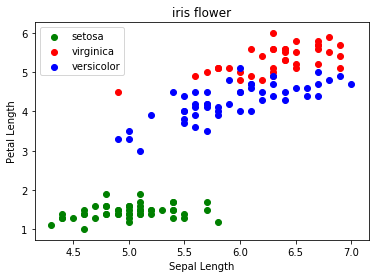

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

iris = pd.read_csv('./data_iris.csv')

df = iris[(iris.SepalLength >= 4) & (iris.SepalLength <= 7)]
df_setosa = df[df.Species == 'setosa']
df_virginica = df[df.Species == 'virginica']
df_versicolor = df[df.Species == 'versicolor']

plt.scatter(df_setosa.SepalLength, df_setosa.PetalLength, color='green', label='setosa')
plt.scatter(df_virginica.SepalLength, df_virginica.PetalLength, color='red', label='virginica')
plt.scatter(df_versicolor.SepalLength, df_versicolor.PetalLength, color='blue', label='versicolor')
plt.legend()
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('iris flower')
plt.show();

# 11. __SQL(3)__ [김준태]

### (*) 주의사항:
1. sqlitestudio 는 사용하지 않고, python 코드로만 모든 것을 수행해주세요.

#### 1). 당신은 현재 제2의 페이스북을 개발하고자 합니다. 파이썬과 Sqlite3 모듈을 이용해서,
####      사용자가 글을 쓰면, 이를 'imzuckerberg.db'에다가 저장하고, 사용자의 필요에 따라 글을 읽어오는 코드를 작성하세요.
####      - 세부사항
####        1) 처음 코드를 실행하면 '당신의 이름을 적어주세요 : ' 를 띄우고 사용자의 이름을 input으로 받습니다.
####        2) 이후 '글을 쓰려면 0, 글을 읽으려면 1을 입력해주세요 : ' 를 띄우고 input을 받습니다.
####        3) 'imzuckerberg.db'에는 글 제목 / 글 내용 / 글쓴이 총 3개의 어트리뷰트를 가진 feed 라는 테이블을 create 합니다.
####        4) 2) 에서 받았던 input을 통해 글을 읽는 함수, 쓰는 함수 중 하나로 분기하고, 글을 쓰는 함수의 경우 사용자로부터 제목, 내용을 입력받도록 하고, 1) 에서 받았던 사용자의 이름과 함께 db에 쿼리문을 통해 기록되도록 합니다.
####        5) 글을 읽는 함수로 분기할 경우, '검색할 제목을 입력해주세요 : ' 를 띄우고 input을 받습니다.
####        6) 5) 에서 받은 input을 이용해 db에 쿼리문을 수행하여, 해당 input에 쓰여진 문자열이 제목에 포함되어 있는 글을 전부 리스팅합니다. (제목, 내용, 작성자 모두)
####        7) 어떤 인풋이든 사용자가 올바르지 않은 입력 혹은 공백을 입력할 경우 무조건 다시 인풋을 받도록 해야합니다.

In [ ]:
# 답안.
import sqlite3

def namecheck():
    try:
        username = str(input("당신의 이름을 적어주세요 : "))
        return username
    except:
        print("올바르지 않은 입력입니다!")
        username = namecheck()
        return username

def readcheck():
    try:
        read_check = int(input("글을 쓰려면 0, 글을 읽으려면 1을 입력해주세요 : "))
        return read_check
    except:
        print("올바르지 않은 입력입니다!")
        read_check = readcheck()
        return read_check

def user_input():
    try:
        title = str(input("제목을 입력해주세요 : "))
        content = str(input("내용을 입력해주세요 : "))
        return title, content
    except:
        print("올바르지 않은 입력입니다!")
        title, content = user_input()
        return title, content

def user_search():
    try:
        title = str(input("검색할 제목을 입력해주세요 : "))
        return title
    except:
        print("올바르지 않은 입력입니다!")
        title = user_search()
        return title

def write(title, content, username, cursor):
    cursor.execute(f'insert into feed values ("{title}", "{content}", "{username}")')
    print(f'{username}님 글쓰기 완료!')

def read(title, cursor):
    user_check = 0
    for i in cursor.execute('SELECT title, content, user FROM feed'):
        if title in i[0]:
            user_check = user_check + 1
            print(f"제목 : {i[0]}, 내용 : {i[1]}, 작성자 : {i[2]}")
    if (user_check == 0):
        print("해당 내용이 없습니다!")

def exitcheck():
    stop = int(input("\n계속하시려면 0, 종료하시려면 1을 눌러주세요. : "))
    if stop == 0:
        start()
    if stop == 1:
        exit()
    else:
        print("올바른 입력을 해주세요!")
        exitcheck()

def start():
    print("\n나만의 페이스북!")

    username = namecheck()
    read_check = readcheck()

    conn = sqlite3.connect('imzuckerberg.db')
    cursor = conn.cursor()

    cursor.execute('create table if not exists feed(title text, content text, user text)')
    conn.commit()

    if read_check == 0:
        title, content = user_input()
        write(title, content, username, cursor)
        conn.commit()
    elif read_check == 1:
        title = user_search()
        read(title, cursor)
    else:
        print("올바른 숫자를 입력하세요!")
        start()

    conn.close()
    exitcheck()

start()

★ 11번 수정사항

- 이렇게하면 공백도 입력받음

In [ ]:
# my solution
import sqlite3

def namecheck():
    name = input('당신의 이름을 적어주세요: ')
    return name 

def readcheck():
    #여기서 글을 쓰려면 0, 읽으려면 1이라는 인풋값을 받아주세요
    read = int(input('글을 쓰려면 0, 글을 읽으려면 1을 입력해주세요: '))
    return read

def user_input():
    #사용자가 글을 쓴다고 말한다면 인풋으로 제목과 내용을 받아주세요
    title = input('제목을 입력하세요: ')
    content = input('내용을 입력하세요: ')
    return title, content
    
def user_search():
    #사용자가 글을 읽는다고 말한다면 인풋으로 검색할 제목을 받아주세요
    title = input('제목을 입력하세요: ')
    return title

def write(title, content, username, cursor):
    #user_input으로 부터 받은 내용과 namecheck으로부터 받은 내용을 함께 쿼리문으로 db에 insert해주세요
    sql = "insert into feed values (?, ?, ?, ?)"
    x = [None, title, content, username]
    cursor.execute(sql, x)
    
def read(title, cursor):
    #user_search로 받은 내용을 통해 해당 내용을 제목에 포함하는 글이 있으면 제목, 내용, 작성자를 모두 표시해주세요
    sql = "select * from feed where title like ?"
    for i in cursor.execute(sql, ['%'+title+'%']):
        print('No.'+ str(i[0]) +'\t제목: ' + i[1] + '\t내용: ' + i[2] + '\t작성자: ' + i[3])
    
    
    
    
def start():
    print("\n나만의 페이스북!")
    username = ''
    
    while True:
        username = namecheck()
        
        if username == '':
            print('이름을 입력하지 않았습니다. 다시 입력하세요.')
            continue
        else:
            break
        
    read_check = readcheck()

    #db에 연결하고 커서 객체를 만들어주세요
    conn = sqlite3.connect('imzuckerberg.db')
    cur = conn.cursor()
    
    #여기에서 table을 만들어주세요
    cur.execute("""create table if not exists feed (
                        id integer primary key autoincrement
                      , title varchar(50) not null
                      , content text not null
                      , name varchar(10) not null)""")

    if read_check == 0:
        #user_input 함수로 인풋을 받고, write 함수를 이용해 쿼리를 수행해주세요.
        t = ''
        c = ''
        
        flag = 1
        while flag:
            t, c = user_input()
            if t == '' or c == '':
                print('제목 또는 내용이 없습니다. 다시 입력하세요.')
            else:
                flag = 0
                write(t, c, username, cur)
 
            
            
        
        #쿼리를 수행하신 뒤에는 db에 커밋을 해주세요.
        conn.commit()
        print('---글을 게시했습니다.---')
        
    elif read_check == 1:
        #user_search 함수로 인풋을 받고, read 함수를 이용해 쿼리를 수행해주세요.
        flag = 1
        while flag:
            t = user_search()
            if t == '':
                print('제목이 올바르지 않습니다. 다시 입력하세요.')
            else:
                flag = 0
                read(t, cur)
                
        

        
    else:
        print("올바른 숫자를 입력하세요!")
        start()

    #db와의 연결을 닫아주세요.
    conn.close()
    
start()